# Use-case 1: Data preparation and processing
## Ratings data preparation

---
---

## Preparing environment

In [41]:
import pandas as pd #Importing the pandas library.

df_ratings_raw = pd.read_csv('data/banijay_op1data_ratings_raw.csv', sep=';', decimal=',') #Reading the ratings data. 

---

## Data exploration

### How many rows and columns are there in de dataset?

In [42]:
print(df_ratings_raw.shape) #Checking the shape of the data.

(1304190, 10)


In [43]:
df_ratings_raw.head(10) # Showing the first 10 rows of the dataset to begin exploration.

,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%
0,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitzenddag,9.676969,1546.863437,30.881672
1,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitgesteld,1.484044,237.224411,24.692727
2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,29.962268
3,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,3.217735,117.833443,14.746563
4,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,1.146627,41.989484,17.021271
5,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,totaal,3.975244,145.573420,15.812862
6,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,uitzenddag,5.294855,212.111904,19.696293
7,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,uitgesteld,1.662682,66.607030,22.868945
8,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,totaal,6.271663,251.242825,20.356892
9,2020-01-06,22:18:00,op1,npo1,6_12_jr,live/prerecorded uitzendingen,uitzenddag,1.025859,13.510569,43.995912


### What are the column names?

In [44]:
print(df_ratings_raw.columns) #Checking the columns of the dataset.

Index(['Datum', 'Time', 'Program', 'Station', 'Target Group', 'Broadcast Type',
       'Ratings Type', 'Kdh%', 'Kdh000', 'Zadl%'],
      dtype='object')


### What are the data types of the columns?

In [45]:
print(df_ratings_raw.dtypes) #Checking the data types of the columns.

Datum              object
Time               object
Program            object
Station            object
Target Group       object
Broadcast Type     object
Ratings Type       object
Kdh%              float64
Kdh000            float64
Zadl%             float64
dtype: object


### What are the unique values in the target group column?

In [46]:
print(df_ratings_raw['Target Group'].unique())

['tot6plus' 'boodschapper_20_49' 'boodschapper_25_54' '6_12_jr' '13_19_jr'
 '20_34_jr' '35_49_jr' '50plus_jr' 'm_6plus_jr' 'v_6plus_jr']


### Create a histogram of Kdh000

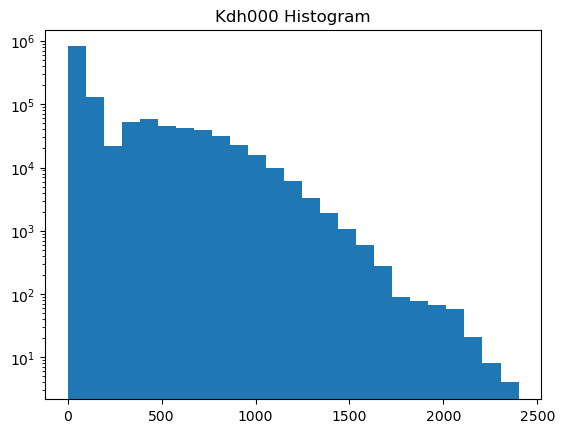

In [47]:
import matplotlib.pyplot as plt #Importing matplotlib as plt, so I will be able to make a visualization.

plt.hist(df_ratings_raw['Kdh000'], log=True, bins=25) #Plotting a histogram of the Kdh000 column, with a log scale and 25 bins, making it more readable.
plt.title('Kdh000 Histogram') #Giving the plot a title.
plt.savefig('visualization/Histogram_Kdh000.png') #Saving the plot as a png file.

### Create a boxplot of Kdh000

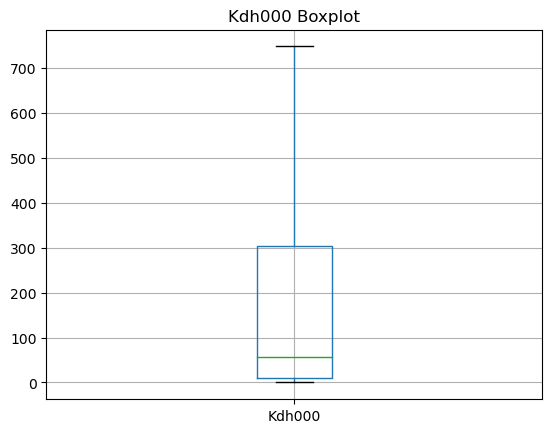

In [48]:
df_ratings_raw.boxplot(column='Kdh000', grid=True, sym='') #Plotting a boxplot of the Kdh000 column. Used grid and sym to make the plot more readable and to hide the outliers.
plt.title('Kdh000 Boxplot') #Giving the plot a title.
plt.savefig('visualization/Boxplot Kdh000.png') #Saving the plot as a png file.

### Create a histogram of Kdh000 for each target group focussing only on totaal ratings type.

In [49]:
df_histogram = df_ratings_raw.loc[df_ratings_raw['Ratings Type'] == 'totaal'] #Creating a new dataframe with only the rows where the Ratings Type is totaal.
df_histogram.head(5) #Showing the first 5 rows of the new dataframe to check if it only shows the Totaal ratings type now.

,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%
2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,29.962268
5,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,totaal,3.975244,145.573420,15.812862
8,2020-01-06,22:18:00,op1,npo1,boodschapper_25_54,live/prerecorded uitzendingen,totaal,6.271663,251.242825,20.356892
11,2020-01-06,22:18:00,op1,npo1,6_12_jr,live/prerecorded uitzendingen,totaal,1.025859,13.510569,39.202527
14,2020-01-06,22:18:00,op1,npo1,13_19_jr,live/prerecorded uitzendingen,totaal,2.895596,41.783444,22.875262


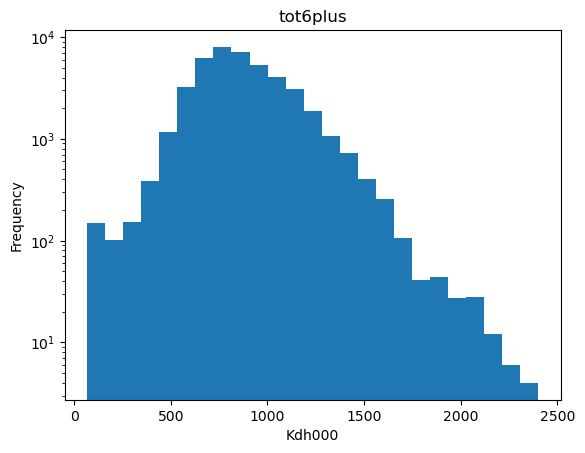

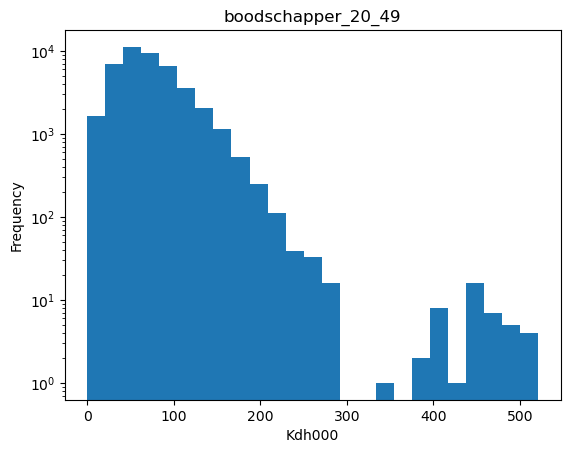

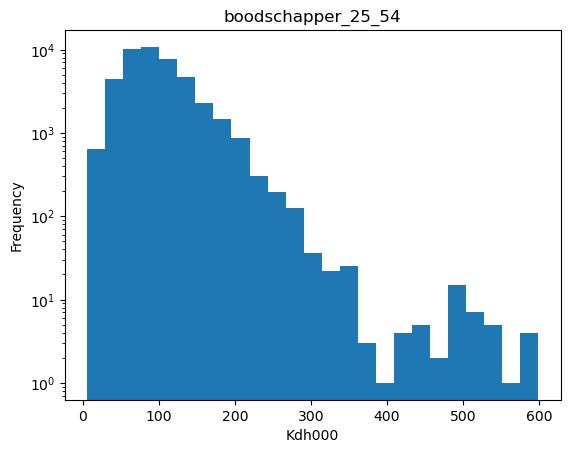

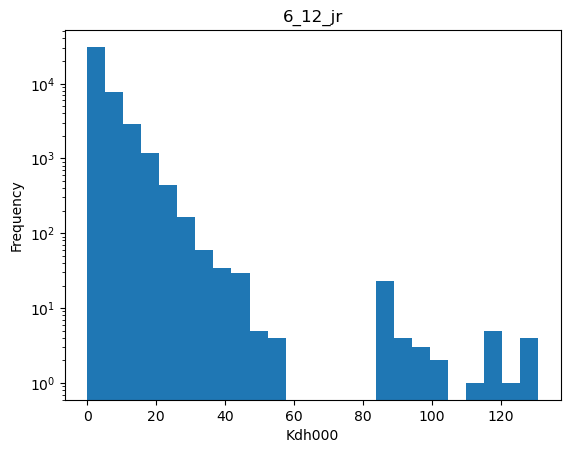

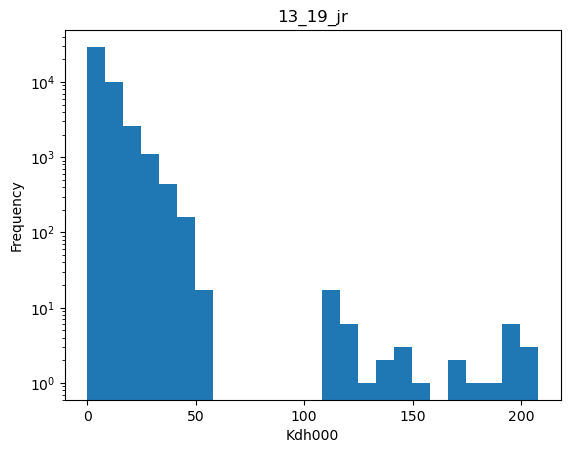

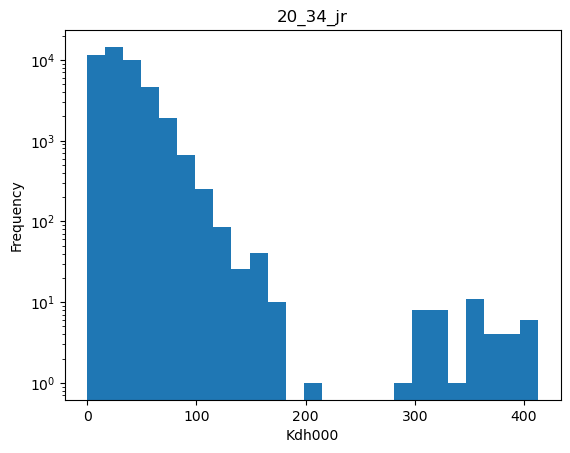

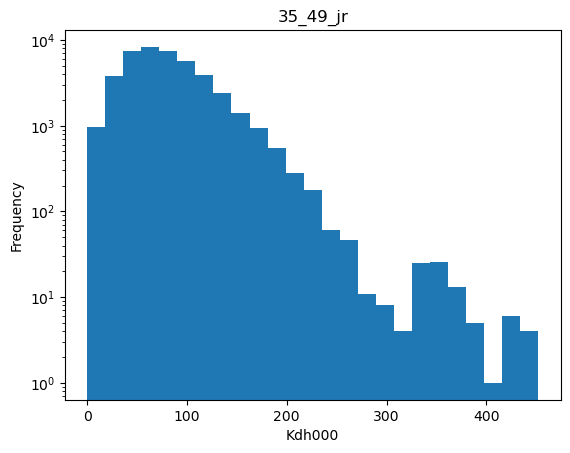

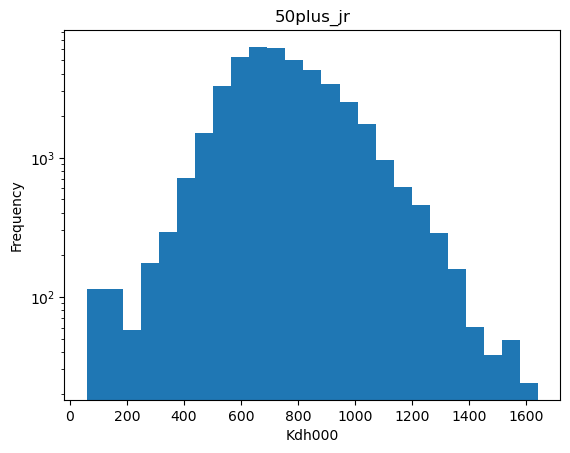

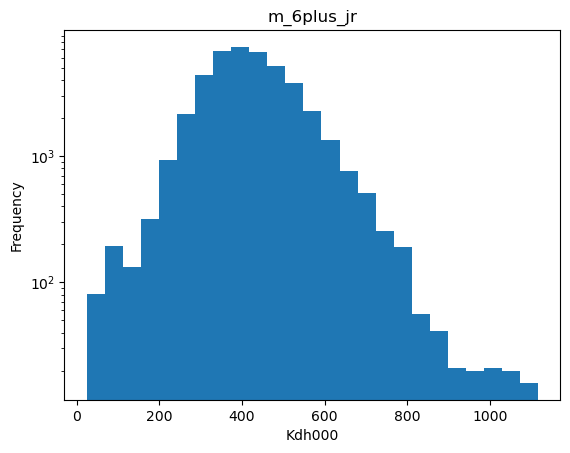

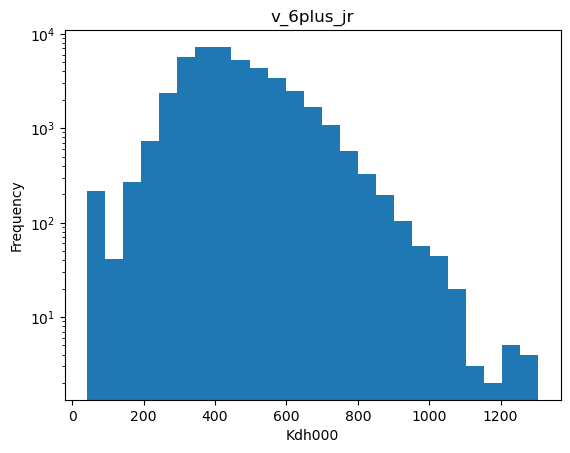

In [50]:
for i in df_histogram['Target Group'].unique(): #Creating a for loop with the unique values of the Target Group column.
    plt.hist(df_histogram['Kdh000'].loc[df_ratings_raw['Target Group'] == i], log=True, bins=25) #Plotting a histogram of the Kdh000 column, with a log scale and 25 bins, making it more readable.
    plt.xlabel('Kdh000') #Giving the plot a x label.
    plt.ylabel('Frequency') #Giving the plot a y label.
    plt.title(i) #Giving the plot a title.
    plt.show() #Showing the plot.

In [51]:
df_ratings_raw.to_csv("data/banijay_op1data_ratings_raw.csv", compression='zip') #Saving the file as a zip file so I will be able to upload it to GitHub.

## Content data preparation

### Check and remove missing values

In [52]:
df_ratings_raw.isnull().sum() #Checking if there are any missing values in the dataset.

Datum                 0
Time                  0
Program               0
Station               0
Target Group          0
Broadcast Type        0
Ratings Type          0
Kdh%                874
Kdh000              874
Zadl%             52208
dtype: int64

In [53]:
df_ratings_raw = df_ratings_raw.dropna() #Dropping all the rows with missing values.

In [54]:
df_ratings_raw.isnull().sum() #Checking if there are still any null values in the dataset.

Datum             0
Time              0
Program           0
Station           0
Target Group      0
Broadcast Type    0
Ratings Type      0
Kdh%              0
Kdh000            0
Zadl%             0
dtype: int64

### Check and remove duplicate data (duplicated across all columns).

In [55]:
df_ratings_raw.duplicated().sum() #Checking if there are any duplicated rows in the dataset.

0

### Check the format of the date and time columns and combine them to create a date_time column and ensure that it's a datetime object.

In [56]:
df_ratings_raw.info() #Checking the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251982 entries, 0 to 1304189
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Datum           1251982 non-null  object 
 1   Time            1251982 non-null  object 
 2   Program         1251982 non-null  object 
 3   Station         1251982 non-null  object 
 4   Target Group    1251982 non-null  object 
 5   Broadcast Type  1251982 non-null  object 
 6   Ratings Type    1251982 non-null  object 
 7   Kdh%            1251982 non-null  float64
 8   Kdh000          1251982 non-null  float64
 9   Zadl%           1251982 non-null  float64
dtypes: float64(3), object(7)
memory usage: 105.1+ MB


In [57]:
df_ratings_raw['date_time'] = pd.to_datetime(df_ratings_raw['Datum'] + ' ' + df_ratings_raw['Time'], infer_datetime_format=True) #Creating a new column with the date and time combined.
df_ratings_raw.head() #Showing the first 5 rows to check if the code worked.

,Datum,Time,Program,Station,Target Group,Broadcast Type,Ratings Type,Kdh%,Kdh000,Zadl%,date_time
0,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitzenddag,9.676969,1546.863437,30.881672,2020-01-06 22:18:00
1,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,uitgesteld,1.484044,237.224411,24.692727,2020-01-06 22:18:00
2,2020-01-06,22:18:00,op1,npo1,tot6plus,live/prerecorded uitzendingen,totaal,10.299407,1646.360210,29.962268,2020-01-06 22:18:00
3,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitzenddag,3.217735,117.833443,14.746563,2020-01-06 22:18:00
4,2020-01-06,22:18:00,op1,npo1,boodschapper_20_49,live/prerecorded uitzendingen,uitgesteld,1.146627,41.989484,17.021271,2020-01-06 22:18:00


In [58]:
df_ratings_raw.to_csv('data/banijay_op1data_ratings_processed.csv',compression='zip') #Saving the file as a zip file so I will be able to upload it to GitHub.